Notebook réalisé en janvier 2023 dans le cadre de la formation Data Analyst d'OpenClassRooms.

Dans ce projet Python, il était question de réaliser une étude de santé publique fictive en répondant aux questions de trois interlocuteurs différents.
Les données sont toutes issues du site de la FAO, organisme de l'ONU chargé des questions d'alimentation et d'agriculture. 

Compétences utilisées :

+ Manipuler des DataFrames (jointures, groupement de lignes, ajout et suppression de colonnes, calculs entre colonnes..)<br>
+ Rechercher des données pertinentes, explorer, nettoyer et analyser ces données<br>
+ Utiliser des librairies spécialisées pour représenter visuellement des résultats<br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Première-exploration-des-données" data-toc-modified-id="Première-exploration-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Première exploration des données</a></span></li><li><span><a href="#Calcul-de-la-proportion-de-personnes-en-état-de-sous-nutrition" data-toc-modified-id="Calcul-de-la-proportion-de-personnes-en-état-de-sous-nutrition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calcul de la proportion de personnes en état de sous-nutrition</a></span></li><li><span><a href="#Calcul-du-nombre-théorique-de-personnes-qui-pourraient-être-nourries-" data-toc-modified-id="Calcul-du-nombre-théorique-de-personnes-qui-pourraient-être-nourries--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calcul du nombre théorique de personnes qui pourraient être nourries <a class="anchor" id="second-bullet" rel="nofollow"></a></a></span></li><li><span><a href="#Calcul-de-la-disponibilité-alimentaire-des-produits-végétaux" data-toc-modified-id="Calcul-de-la-disponibilité-alimentaire-des-produits-végétaux-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calcul de la disponibilité alimentaire des produits végétaux</a></span><ul class="toc-item"><li><span><a href="#Utilisation-de-la-disponibilité-intérieure" data-toc-modified-id="Utilisation-de-la-disponibilité-intérieure-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Utilisation de la disponibilité intérieure</a></span></li><li><span><a href="#Résultat-graphique" data-toc-modified-id="Résultat-graphique-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Résultat graphique</a></span></li></ul></li><li><span><a href="#Série-de-questions-de-Mélanie" data-toc-modified-id="Série-de-questions-de-Mélanie-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Série de questions de Mélanie</a></span><ul class="toc-item"><li><span><a href="#Quels-sont-les-pays-pour-lesquels-la-proportion-de-personnes-sous-alimentées-est-la-plus-forte-en-2017-?" data-toc-modified-id="Quels-sont-les-pays-pour-lesquels-la-proportion-de-personnes-sous-alimentées-est-la-plus-forte-en-2017-?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Quels sont les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 ?</a></span><ul class="toc-item"><li><span><a href="#Résultat-graphique" data-toc-modified-id="Résultat-graphique-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Résultat graphique</a></span></li></ul></li><li><span><a href="#Quels-sont-les-pays-ayant-le-plus-bénéficié-d'aide-alimentaire-depuis-2013-?" data-toc-modified-id="Quels-sont-les-pays-ayant-le-plus-bénéficié-d'aide-alimentaire-depuis-2013-?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Quels sont les pays ayant le plus bénéficié d'aide alimentaire depuis 2013 ?</a></span></li><li><span><a href="#Quels-sont-les-pays-ayant-le-plus/le-moins-de-disponibilité/habitant-?" data-toc-modified-id="Quels-sont-les-pays-ayant-le-plus/le-moins-de-disponibilité/habitant-?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Quels sont les pays ayant le plus/le moins de disponibilité/habitant ?</a></span></li><li><span><a href="#Questions-annexes" data-toc-modified-id="Questions-annexes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Questions annexes</a></span><ul class="toc-item"><li><span><a href="#Sur-l’utilisation-des-céréales-mondiales." data-toc-modified-id="Sur-l’utilisation-des-céréales-mondiales.-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Sur l’utilisation des céréales mondiales.</a></span></li><li><span><a href="#Sur-l'utilisation-du-manioc-par-la-Thaïlande" data-toc-modified-id="Sur-l'utilisation-du-manioc-par-la-Thaïlande-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Sur l'utilisation du manioc par la Thaïlande</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# import des librairies générales
import pandas as pd
import numpy as np

# et des outils de visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Première exploration des données

In [2]:
# import des données
s_n = pd.read_csv('sous_nutrition_3.csv') # population sous nutri en millions par pays et par an
popu = pd.read_csv('population.csv') # population par pays et par an

Explorons nos données :

In [3]:
display (s_n.shape) # nous avons pour ce dataframe 1218 lignes et 3 colonnes

(1218, 3)

In [4]:
display(s_n.head()) # voyons les 5 premières lignes

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [5]:
s_n.nunique() # nombre d'occurences uniques

Zone      203
Année       6
Valeur    139
dtype: int64

On a donc les données pour 203 pays différents, sur 6 années différentes.

In [6]:
# regardons maintenant si nous avons des valeurs vides / manquantes
display(s_n.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   int64 
 2   Valeur  624 non-null    object
dtypes: int64(1), object(2)
memory usage: 28.7+ KB


None

Visiblement la colonne "Valeur" a des données nulles. (624 valeurs non_null seulement, contre 1218 pour les autres colonnes).

In [7]:
s_n.count()

Zone      1218
Année     1218
Valeur     624
dtype: int64

In [9]:
#filtrage sur l'année 2017 uniquement
sn_2017 = s_n.loc[s_n['Année']==2017,:].copy()
sn_2017.rename(columns = {'Valeur':'Sous-nutri en millions'},inplace=True)
sn_2017.reset_index(inplace=True)
display(sn_2017)

# on réduit notre champs d'exploration de 1218 à 203 lignes :

,index,Zone,Année,Sous-nutri en millions
0,4,Afghanistan,2017,10.5
1,10,Afrique du Sud,2017,3.1
2,16,Albanie,2017,0.1
3,22,Algérie,2017,1.3
4,28,Allemagne,2017,NaN
...,...,...,...,...
198,1192,Venezuela (République bolivarienne du),2017,8
199,1198,Viet Nam,2017,6.5
200,1204,Yémen,2017,NaN
201,1210,Zambie,2017,NaN


# Calcul de la proportion de personnes en état de sous-nutrition 

Maintenant nous allons croiser ces infos (le nombre de personnes sous-nutries) avec le fichier de la population totale pour 2017 :

In [10]:
# on commence par voir quelles infos contient le fichier population
display(popu)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [11]:
# filtrage sur les données de 2017
popu_2017 = popu.loc[popu['Année']==2017,:]
display(popu_2017)

# on passe de 1416 à 236 lignes :

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [12]:
# création jointure entre les deux fichiers popu_2017 (236 lignes) et sn_2017 (203 lignes).
# le fichier popu_2017 a plus de lignes (pays), donc on va le prendre comme base.

popu_nutri = pd.merge(sn_2017,popu_2017, on='Zone',how='right')
popu_nutri.pop('index')
popu_nutri.pop('Année_x')
popu_nutri['Valeur'] = popu_nutri['Valeur']/1000
popu_nutri.rename(columns={'Valeur':'Population en millions','Année_y':'Année'},inplace=True)

popu_nutri = popu_nutri.iloc[:,[0,2,3,1]]
display(popu_nutri)

,Zone,Année,Population en millions,Sous-nutri en millions
0,Afghanistan,2017,36.296113,10.5
1,Afrique du Sud,2017,57.009756,3.1
2,Albanie,2017,2.884169,0.1
3,Algérie,2017,41.389189,1.3
4,Allemagne,2017,82.658409,NaN
...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29.402484,8
232,Viet Nam,2017,94.600648,6.5
233,Yémen,2017,27.834819,NaN
234,Zambie,2017,16.853599,NaN


In [13]:
# la dernière colonne n'est pas utilisable en temps que float64 à cause des NaN et des '<0.1'

popu_nutri.dtypes

Zone                       object
Année                       int64
Population en millions    float64
Sous-nutri en millions     object
dtype: object

In [14]:
# on remplace les valeurs manquantes NaN et '<0.1' par des 0

popu_nutri['Sous-nutri en millions'] = popu_nutri['Sous-nutri en millions'].fillna(0)
popu_nutri.loc[popu_nutri['Sous-nutri en millions']=='<0.1',:] = 0

# et de cette manière on peut convertir la colonne 'Sous-nutri en millions' en float64 :
popu_nutri['Sous-nutri en millions'] = popu_nutri['Sous-nutri en millions'].astype('float64')

display(popu_nutri)

,Zone,Année,Population en millions,Sous-nutri en millions
0,Afghanistan,2017,36.296113,10.5
1,Afrique du Sud,2017,57.009756,3.1
2,Albanie,2017,2.884169,0.1
3,Algérie,2017,41.389189,1.3
4,Allemagne,2017,82.658409,0.0
...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29.402484,8.0
232,Viet Nam,2017,94.600648,6.5
233,Yémen,2017,27.834819,0.0
234,Zambie,2017,16.853599,0.0


In [15]:
# on rajoute une ligne avec le total

popu_nutri =  popu_nutri.iloc[0:236,[0,1,2,3]].copy()
popu_nutri.loc['Total',:]= popu_nutri.sum(axis=0)
display(popu_nutri)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8600\1314140373.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Zone,Année,Population en millions,Sous-nutri en millions
0,Afghanistan,2017.0,36.296113,10.5
1,Afrique du Sud,2017.0,57.009756,3.1
2,Albanie,2017.0,2.884169,0.1
3,Algérie,2017.0,41.389189,1.3
4,Allemagne,2017.0,82.658409,0.0
...,...,...,...,...
232,Viet Nam,2017.0,94.600648,6.5
233,Yémen,2017.0,27.834819,0.0
234,Zambie,2017.0,16.853599,0.0
235,Zimbabwe,2017.0,14.236595,0.0


In [16]:
# création d'une colonne ratio Sous-nutri en millions / Population en millions

popu_nutri['Ratio'] = round ( (popu_nutri['Sous-nutri en millions']*100) / popu_nutri['Population en millions'],2)

display(popu_nutri)

,Zone,Année,Population en millions,Sous-nutri en millions,Ratio
0,Afghanistan,2017.0,36.296113,10.5,28.93
1,Afrique du Sud,2017.0,57.009756,3.1,5.44
2,Albanie,2017.0,2.884169,0.1,3.47
3,Algérie,2017.0,41.389189,1.3,3.14
4,Allemagne,2017.0,82.658409,0.0,0.00
...,...,...,...,...,...
232,Viet Nam,2017.0,94.600648,6.5,6.87
233,Yémen,2017.0,27.834819,0.0,0.00
234,Zambie,2017.0,16.853599,0.0,0.00
235,Zimbabwe,2017.0,14.236595,0.0,0.00


Avec cette méthode, on constate qu'il y a 7,11 % de personnes sous-nourris dans le monde.

# Calcul du nombre théorique de personnes qui pourraient être nourries <a class="anchor" id="second-bullet"></a>

Calculé à partir de la disponibilité alimentaire mondiale.

(Question de Mélanie)


On va avoir besoin de 2 fichiers :

-population mondiale pour 2017. On appellera le Dataframe 'popu_2017'

-disponibilité alimentaire mondiale. On appellera le Dataframe 'dispo_par_pays'


In [17]:
# on télécharge le csv de dispo alimentaire

dispo = pd.read_csv('dispo_alimentaire.csv')

In [18]:
display(dispo)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
# On aggrège les données par pays :

dispo_par_pays = dispo.groupby('Zone').sum()
display(dispo_par_pays)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [20]:
# on rajoute une ligne avec les totaux à la fin de notre dataframe dispo_par_pays

dispo_par_pays.loc['Total',:] = dispo_par_pays.sum(axis=0)
display(dispo_par_pays)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0


In [21]:
# calcul du nombre moyen de calorie disponible par jour et par personne:
moyenne_calorie_dispo =(dispo_par_pays.loc['Total','Disponibilité alimentaire (Kcal/personne/jour)'] /174)
display(moyenne_calorie_dispo)


2847.367816091954

In [22]:
# On calcule le total de calorie dispo par jour pour l'ensemble de la population mondiale :

total_calorie = moyenne_calorie_dispo * popu_nutri.loc['Total','Population en millions']
display(total_calorie)

21449952.09138131

In [23]:
# on prend pour hypothèse que le nombre moyen de calorie nécessaire pour un individu est 2500 calorie/jour.
# En divisant le nbre total de calorie dispo par jour par 2500, on obtient le nombre d'individu théoriquement nourrissable
nb_personne_nourrissables = round (total_calorie / 2500,2)
print('Le nombre de personnes théoriquement nourrissables est de',nb_personne_nourrissables,'millions, ou en milliards,',round(nb_personne_nourrissables/1000,2),'.')


Le nombre de personnes théoriquement nourrissables est de 8579.98 millions, ou en milliards, 8.58 .


En proportion :

In [24]:
round((nb_personne_nourrissables *100 / popu_nutri.iloc[-1,2]),2)

113.89

# Calcul de la disponibilité alimentaire des produits végétaux

On recherche ici le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale des produits végétaux.

In [25]:
# On fait un filtre sur l'origine des produits alimentaires
dispo_vegetale = dispo.loc[dispo['Origine']=='vegetale',:]

# On regroupe par pays
dispo_vegetale_pays = dispo_vegetale.groupby('Zone').sum()

# On rajoute une ligne avec le total :
dispo_vegetale_pays.loc['Total',:] = dispo_vegetale_pays.sum(axis=0)

display(dispo_vegetale_pays)

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0
Éthiopie,667.0,3641.0,2005.0,300.99,17.88,52.70,38824.0,918.0,1694.0,28320.0,2125.0,40907.0,635.0,3443.0,-2857.0


In [26]:
# calcul du nombre moyen de calorie disponible par jour et par personne:
moyenne_calorie_vegetale_dispo =((dispo_vegetale_pays.loc['Total','Disponibilité alimentaire (Kcal/personne/jour)'] )/174)
display(moyenne_calorie_vegetale_dispo)


2291.8505747126437

In [27]:
# On calcule le total de calorie dispo par jour pour l'ensemble de la population mondiale :

total_calorie = moyenne_calorie_vegetale_dispo * popu_nutri.loc['Total','Population en millions']
display(total_calorie)

17265098.22523166

In [28]:
# On prend pour hypothèse que le nombre moyen de calorie nécessaire pour un individu est 2500 calorie/jour.
# En divisant le nbre total de calorie dispo par jour par 2500, on obtient le nombre d'individu théoriquement nourrissable
nb_personne_nourrissables = round (total_calorie / 2500,2)
print('Le nombre de personnes théoriquement nourrissables uniquement grâce aux végétaux est de',nb_personne_nourrissables,'millions, ou en milliards,',round(nb_personne_nourrissables/1000,2),'.')


Le nombre de personnes théoriquement nourrissables uniquement grâce aux végétaux est de 6906.04 millions, ou en milliards, 6.91 .


Proportion personne nourrissable grâce aux végétaux :

In [29]:
round(((nb_personne_nourrissables *100) / popu_nutri.iloc[-1,2]),2)

91.67

## Utilisation de la disponibilité intérieure

Calculer l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

(Réponse à la question de Julien)

"Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur
les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type :
A1 + A2 + … = disponibilité intérieure = B1 + B2 + …Mais je ne me souviens plus
exactement ! Peux tu la retrouver ?"

Disponibilité intérieure = nourriture – perte – semences - traitement-aliments pour animaux – autres utilisations

(et
Disponibilité intérieure = production + importation – exportations +- variation de stock )

In [30]:
# Calcul de la disponibilité et ses composants (Nourriture, Aliments pour animaux, etc...)
# On sélectionne uniquements les colonnes dont on a besoin
d_i = dispo_par_pays.iloc[:,[6,9,0,1,-2,-3,10]]
display(d_i)

,Disponibilité intérieure,Nourriture,Aliments pour animaux,Autres Utilisations,Traitement,Semences,Pertes
Zone,,,,,,,
Afghanistan,13515.0,10735.0,768.0,415.0,63.0,395.0,1135.0
Afrique du Sud,61256.0,29812.0,5309.0,876.0,22819.0,253.0,2193.0
Albanie,4758.0,3476.0,660.0,174.0,113.0,55.0,276.0
Algérie,42630.0,31729.0,4352.0,1707.0,637.0,449.0,3753.0
Allemagne,162275.0,79238.0,30209.0,7711.0,39842.0,1551.0,3781.0
...,...,...,...,...,...,...,...
Équateur,18614.0,8574.0,1200.0,1909.0,6200.0,138.0,707.0
États-Unis d'Amérique,777992.0,320889.0,148432.0,154699.0,141010.0,10403.0,7162.0
Éthiopie,44014.0,33361.0,685.0,3641.0,3443.0,640.0,2256.0


In [31]:
# Calcul des totaux pour chaque composants de la disponibilité intérieure

totaux = d_i.tail(1).T.sort_values('Total').reset_index()
totaux['Pourcentage'] = round((totaux['Total'] *100/ totaux.iloc[6,1]),2)
totaux.rename(columns = {'index':'Catégories','Total':'Nourriture en milliers de tonne','Pourcentage':'Part de la disponibilité intérieure'},inplace=True)


display(totaux)

Zone,Catégories,Nourriture en milliers de tonne,Part de la disponibilité intérieure
0,Semences,154681.0,1.57
1,Pertes,453698.0,4.61
2,Autres Utilisations,865023.0,8.78
3,Aliments pour animaux,1304245.0,13.24
4,Traitement,2204687.0,22.38
5,Nourriture,4876258.0,49.51
6,Disponibilité intérieure,9848994.0,100.00


## Résultat graphique

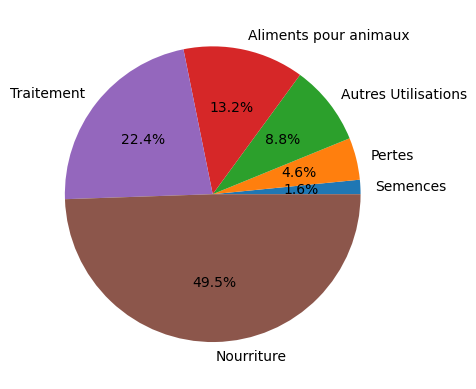

In [32]:
mask = totaux.head(6) # (on met de côté la ligne total)
plt.pie(x=mask['Nourriture en milliers de tonne'], autopct='%1.1f%%',labels=mask['Catégories'])
plt.show()

# Série de questions de Mélanie

## Quels sont les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 ?

In [33]:
# tri par ordre décroissant des taux de personnes sous-nutries les plus élevés

popu_nutri_sorted = popu_nutri.sort_values(by=['Ratio'],ascending=False)
popu_nutri_2017_top30 = popu_nutri_sorted.head(30)
display(popu_nutri_2017_top30)

,Zone,Année,Population en millions,Sous-nutri en millions,Ratio
87,Haïti,2017.0,10.982366,5.3,48.26
181,République populaire démocratique de Corée,2017.0,25.429825,12.0,47.19
128,Madagascar,2017.0,25.570512,10.5,41.06
122,Libéria,2017.0,4.702226,1.8,38.28
119,Lesotho,2017.0,2.091534,0.8,38.25
216,Tchad,2017.0,15.016753,5.7,37.96
186,Rwanda,2017.0,11.980961,4.2,35.06
145,Mozambique,2017.0,28.649018,9.4,32.81
219,Timor-Leste,2017.0,1.243258,0.4,32.17
0,Afghanistan,2017.0,36.296113,10.5,28.93


### Résultat graphique

In [34]:
fig = px.scatter(popu_nutri_2017_top30, x="Ratio", y="Population en millions", color="Zone", hover_data=['Zone'])
fig.show()

## Quels sont les pays ayant le plus bénéficié d'aide alimentaire depuis 2013 ?

In [35]:
# On commence par télécharger les données :
aa = pd.read_csv('aide_alimentaire.csv')
display(aa)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [36]:
# mise en forme du dataframe :

aa_tri = aa.groupby('Pays bénéficiaire').sum() # somme des aides reçues depuis 2013 par pays
aa_1 = aa_tri.sort_values('Valeur',ascending=False) # tri du plus aidé au moins aidé
aa_2 = aa_1.reset_index() # changement d'index
aa_3 = aa_2.iloc[:,[0,2]] # sélection des colonnes qui nous intéressent

display(aa_3)

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
...,...,...
71,Égypte,1122
72,Vanuatu,802
73,Timor-Leste,116
74,Géorgie,70


In [37]:
# sélection des 10 pays les plus aidés depuis 2013

aa_4 = aa_3.head(10)
display(aa_4)

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


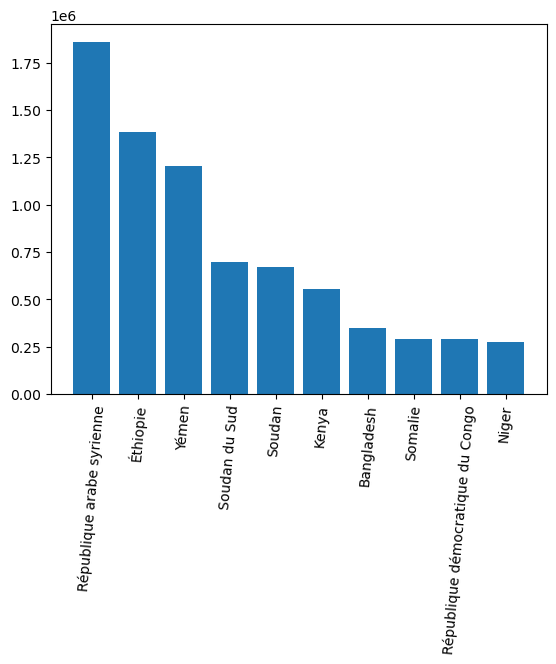

In [38]:
# représentation graphique 

plt.bar(height=aa_4['Valeur'], x=aa_4['Pays bénéficiaire'])
plt.xticks(rotation=85)
plt.show()

## Quels sont les pays ayant le plus/le moins de disponibilité/habitant ?

In [39]:
# On réutilise le dataframe fait plus haut sur la dispo intérieure par pays.

d_i_1 = d_i.reset_index()
display(d_i_1)

,Zone,Disponibilité intérieure,Nourriture,Aliments pour animaux,Autres Utilisations,Traitement,Semences,Pertes
0,Afghanistan,13515.0,10735.0,768.0,415.0,63.0,395.0,1135.0
1,Afrique du Sud,61256.0,29812.0,5309.0,876.0,22819.0,253.0,2193.0
2,Albanie,4758.0,3476.0,660.0,174.0,113.0,55.0,276.0
3,Algérie,42630.0,31729.0,4352.0,1707.0,637.0,449.0,3753.0
4,Allemagne,162275.0,79238.0,30209.0,7711.0,39842.0,1551.0,3781.0
...,...,...,...,...,...,...,...,...
170,Équateur,18614.0,8574.0,1200.0,1909.0,6200.0,138.0,707.0
171,États-Unis d'Amérique,777992.0,320889.0,148432.0,154699.0,141010.0,10403.0,7162.0
172,Éthiopie,44014.0,33361.0,685.0,3641.0,3443.0,640.0,2256.0
173,Îles Salomon,695.0,362.0,0.0,237.0,90.0,0.0,6.0


In [40]:
display(popu_2017)

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [41]:
# on fait une jointure entre le df population 'popu_2017' (236 lignes)
# et le df disponibilité intérieure 'new_tri'(175 lignes) :
popu_dispo = pd.merge(popu_2017,d_i_1,on='Zone',how='left')

# on sélectionne uniquement les colonnes qui nous intéressent :
popu_dispo_1 = popu_dispo.iloc[:,[0,2,3,4]]
# Les colonnes sont : Pays(Zone), Valeur(Population en milliers),
# Disponibilité intérieure (en milliers de tonne), Nourriture (en milliers de tonne)

# on modifie la colonne 'Valeur' (qui correspond à la population en milliers) pour la convertir en million.
popu_dispo_1['Valeur']=popu_dispo_1['Valeur']/1000

# on modifie le titre de la colonne 'Valeur'.
popu_dispo_1.rename(columns={'Valeur':'Population en million'},inplace=True)

# on crée une colonne avec le ratio disponibilité/population
popu_dispo_1["Disponibilité intérieur par million d'habitant"] = popu_dispo_1['Disponibilité intérieure']  / popu_dispo_1['Population en million']

# et une autre avec le ratio nourriture/population
popu_dispo_1["Nourriture par million d'habitant"] = popu_dispo_1['Nourriture']  / popu_dispo_1['Population en million']

display(popu_dispo_1)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8600\3049425496.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8600\3049425496.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8600\3049425496.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Zone,Population en million,Disponibilité intérieure,Nourriture,Disponibilité intérieur par million d'habitant,Nourriture par million d'habitant
0,Afghanistan,36.296113,13515.0,10735.0,372.353921,295.761698
1,Afrique du Sud,57.009756,61256.0,29812.0,1074.482760,522.928041
2,Albanie,2.884169,4758.0,3476.0,1649.695285,1205.199834
3,Algérie,41.389189,42630.0,31729.0,1029.979109,766.601153
4,Allemagne,82.658409,162275.0,79238.0,1963.200139,958.619951
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),29.402484,32287.0,19853.0,1098.104500,675.215060
232,Viet Nam,94.600648,95134.0,52700.0,1005.637932,557.078637
233,Yémen,27.834819,9782.0,9162.0,351.430343,329.156083
234,Zambie,16.853599,10041.0,5088.0,595.777792,301.893975


In [42]:
popu_dispo_nourriture = popu_dispo_1.sort_values("Nourriture par million d'habitant")

popu_dispo_nourriture = popu_dispo_nourriture.dropna()

display(popu_dispo_nourriture)

,Zone,Population en million,Disponibilité intérieure,Nourriture,Disponibilité intérieur par million d'habitant,Nourriture par million d'habitant
216,Tchad,15.016753,5304.0,4097.0,353.205517,272.828620
0,Afghanistan,36.296113,13515.0,10735.0,372.353921,295.761698
234,Zambie,16.853599,10041.0,5088.0,595.777792,301.893975
66,Éthiopie,106.399924,44014.0,33361.0,413.665709,313.543457
72,Gambie,2.213889,940.0,701.0,424.592200,316.637374
...,...,...,...,...,...,...
125,Lituanie,2.845414,7467.0,3169.0,2624.222697,1113.721940
107,Irlande,4.753279,10738.0,5320.0,2259.072106,1119.227380
76,Grèce,10.569450,22584.0,11919.0,2136.724238,1127.684033
143,Monténégro,0.627563,1012.0,752.0,1612.587103,1198.286068


On a ci-dessous le top 10 des pays ayant le plus de Nourriture par habitant :

In [43]:
popu_dispo_nourriture.tail(10).sort_values("Nourriture par million d'habitant",ascending=False)

,Zone,Population en million,Disponibilité intérieure,Nourriture,Disponibilité intérieur par million d'habitant,Nourriture par million d'habitant
2,Albanie,2.884169,4758.0,3476.0,1649.695285,1205.199834
143,Monténégro,0.627563,1012.0,752.0,1612.587103,1198.286068
76,Grèce,10.569450,22584.0,11919.0,2136.724238,1127.684033
107,Irlande,4.753279,10738.0,5320.0,2259.072106,1119.227380
125,Lituanie,2.845414,7467.0,3169.0,2624.222697,1113.721940
184,Roumanie,19.653969,37453.0,21798.0,1905.620183,1109.088958
69,Finlande,5.511371,10034.0,5938.0,1820.599629,1077.408870
166,Pays-Bas,17.021347,42461.0,17924.0,2494.573432,1053.030644
172,Portugal,10.288527,18274.0,10801.0,1776.153185,1049.810143
29,Bosnie-Herzégovine,3.351525,5272.0,3498.0,1573.015269,1043.703985


Et ci-dessous les 10 pays ayant le moins de disponibilité par habitant :

In [44]:
popu_dispo_nourriture.head(10)

,Zone,Population en million,Disponibilité intérieure,Nourriture,Disponibilité intérieur par million d'habitant,Nourriture par million d'habitant
216,Tchad,15.016753,5304.0,4097.0,353.205517,272.828620
0,Afghanistan,36.296113,13515.0,10735.0,372.353921,295.761698
234,Zambie,16.853599,10041.0,5088.0,595.777792,301.893975
66,Éthiopie,106.399924,44014.0,33361.0,413.665709,313.543457
72,Gambie,2.213889,940.0,701.0,424.592200,316.637374
233,Yémen,27.834819,9782.0,9162.0,351.430343,329.156083
84,Guinée-Bissau,1.828145,786.0,609.0,429.944014,333.124561
235,Zimbabwe,14.236595,9507.0,4762.0,667.786082,334.490094
219,Timor-Leste,1.243258,447.0,419.0,359.539211,337.017739
200,Sénégal,15.419355,7495.0,5329.0,486.077401,345.604599


## Questions annexes

### Sur l’utilisation des céréales mondiales.
Notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.

In [45]:
# Ici on va se servir du df dispo
dispo.head(20)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,Café,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# On sélectionne les données dont on a besoin:
dispo_c = dispo.loc[dispo['Produit']=='Céréales, Autres',['Zone','Produit','Disponibilité intérieure','Aliments pour animaux','Nourriture']]

# On rajoute une ligne de total:
dispo_c.loc['Total',:]=dispo_c.sum(axis=0)
display(dispo_c)

,Zone,Produit,Disponibilité intérieure,Aliments pour animaux,Nourriture
12,Afghanistan,"Céréales, Autres",0.0,NaN,0.0
81,Afrique du Sud,"Céréales, Autres",12.0,8.0,4.0
176,Albanie,"Céréales, Autres",0.0,0.0,0.0
267,Algérie,"Céréales, Autres",4.0,2.0,1.0
361,Allemagne,"Céréales, Autres",2778.0,2373.0,56.0
...,...,...,...,...,...
15266,Équateur,"Céréales, Autres",2.0,1.0,1.0
15361,États-Unis d'Amérique,"Céréales, Autres",271.0,77.0,200.0
15454,Éthiopie,"Céréales, Autres",3274.0,0.0,2495.0
15545,Îles Salomon,"Céréales, Autres",0.0,NaN,0.0


In [47]:
# On calcule la part qui est utilisée pour l'alimentation des animaux et celles des humains:

dispo_c['% Animaux']=round((dispo_c['Aliments pour animaux']*100)/dispo_c['Disponibilité intérieure'],2)
dispo_c['% Humain']=round((dispo_c['Nourriture']*100)/dispo_c['Disponibilité intérieure'],2)

display(dispo_c)

# et on constate que les céréales sont utilisés à quasi 70% pour nourrir les animaux :

,Zone,Produit,Disponibilité intérieure,Aliments pour animaux,Nourriture,% Animaux,% Humain
12,Afghanistan,"Céréales, Autres",0.0,NaN,0.0,NaN,NaN
81,Afrique du Sud,"Céréales, Autres",12.0,8.0,4.0,66.67,33.33
176,Albanie,"Céréales, Autres",0.0,0.0,0.0,NaN,NaN
267,Algérie,"Céréales, Autres",4.0,2.0,1.0,50.00,25.00
361,Allemagne,"Céréales, Autres",2778.0,2373.0,56.0,85.42,2.02
...,...,...,...,...,...,...,...
15266,Équateur,"Céréales, Autres",2.0,1.0,1.0,50.00,50.00
15361,États-Unis d'Amérique,"Céréales, Autres",271.0,77.0,200.0,28.41,73.80
15454,Éthiopie,"Céréales, Autres",3274.0,0.0,2495.0,0.00,76.21
15545,Îles Salomon,"Céréales, Autres",0.0,NaN,0.0,NaN,NaN


### Sur l'utilisation du manioc par la Thaïlande
notemment aux égards de la proportion de personnes en sous-nutrition.
(Exportation par rapport à la production)

In [48]:
# Sélection sur le manioc uniquement :
dispo_m = dispo.loc[dispo['Produit']=='Manioc',['Zone','Exportations - Quantité','Production']]

# Sélection sur la Thaïlande :
dispo_m_t = dispo_m.loc[dispo['Zone']=='Thaïlande',:]
dispo_m_t = dispo_m_t.reset_index()
display(dispo_m_t)



,index,Zone,Exportations - Quantité,Production
0,13809,Thaïlande,25214.0,30228.0


In [49]:
# Création du ratio :
dispo_m_t['Ratio']=round((dispo_m_t['Exportations - Quantité']*100 )/ dispo_m_t['Production'],2)

display(dispo_m_t)

# On découvre que la Thaïlande exporte ~ 83% de son manioc

,index,Zone,Exportations - Quantité,Production,Ratio
0,13809,Thaïlande,25214.0,30228.0,83.41


In [50]:
# alors que ~9 % de sa population est en état de sous-nutrition:

popu_nutri.loc[popu_nutri['Zone']=='Thaïlande',:]

,Zone,Année,Population en millions,Sous-nutri en millions,Ratio
218,Thaïlande,2017.0,69.20981,6.2,8.96
